## <span style="color:DarkBlue">Mini Project 1 Generating Data with noise, Plotting Single file data with best fit curves and Multiple Text File Handling

<center><span style="color:Olive">Mini Project 1

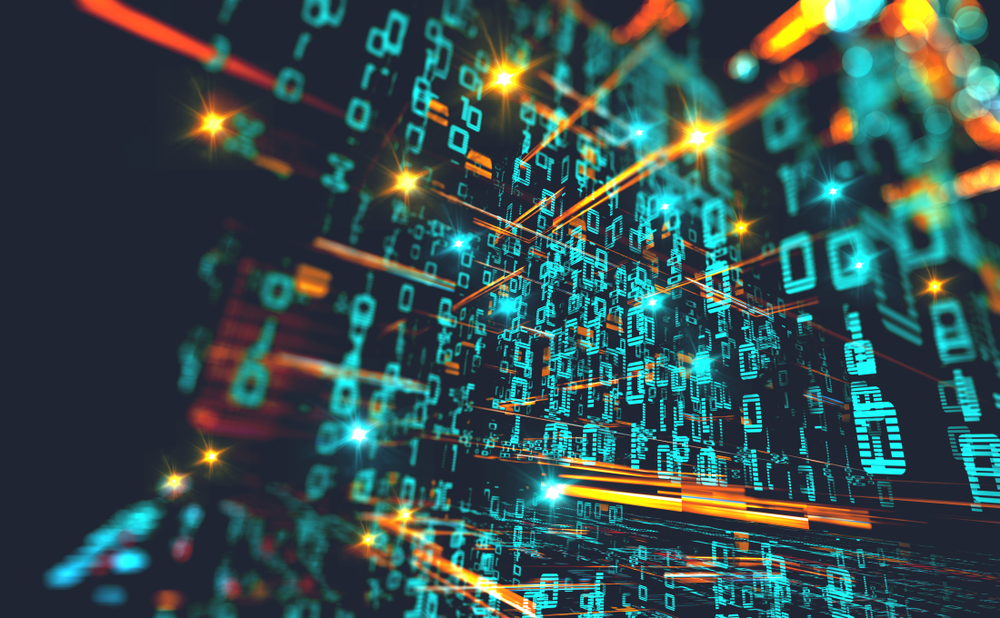

In [1]:
#Importing image
from PIL import Image
from IPython.display import display
dat=Image.open("dat.jpg")
display(dat)

<span style="color:green">1 - Generating Data with noise


<span style="color:red">2 - Plotting Single file data with best fit curves


<span style="color:orange">3 - Multiple File Handling

   ##  <span style="color:green">1 Generating Data with noise

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

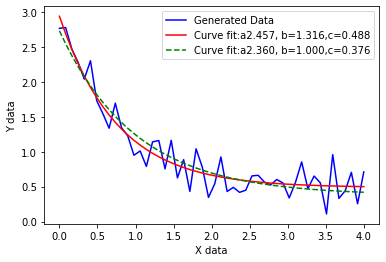

In [3]:
#creating a function 
def func(x, a, b, c):
    return (a * np.exp(-b * x) + c)

#formula 
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise

#plot
plt.plot(xdata, ydata, 'b-', label= 'Generated Data')
popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-', label='Curve fit:a%5.3f, b=%5.3f,c=%5.3f' % tuple(popt))
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3.0, 1.0, 0.5]))
plt.plot(xdata, func(xdata, *popt), 'g--', label='Curve fit:a%5.3f, b=%5.3f,c=%5.3f' % tuple(popt))
plt.xlabel('X data')
plt.ylabel('Y data')
plt.legend()
plt.show()

### <span style="color:green">1.2 ANOTHER EXAMPLE WITH GAUSSIAN CURVE FITTING

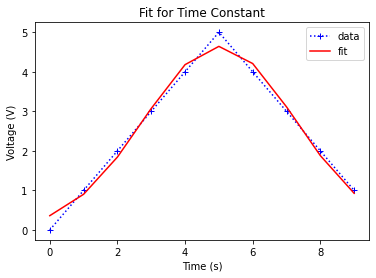

In [4]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
x = np.arange(10)
y = np.array([0, 1, 2, 3, 4, 5, 4, 3, 2, 1])

#formula for mean and sigma
mean = sum(x * y) / sum(y)
sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))

#defing a function for gauss
def Gauss(x, a, x0, sigma):

    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

#plot
popt,pcov = curve_fit(Gauss, x, y, p0=[max(y), mean, sigma])
plt.plot(x, y, 'b+:', label='data')
plt.plot(x, Gauss(x, *popt), 'r-', label='fit')
plt.legend()
plt.title('Fit for Time Constant')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.show()

## <span style="color:red">2 Plotting Single file data with best fit curves


### <span style="color:red">2.1 Plotting text file data with Lognormal fitting curves

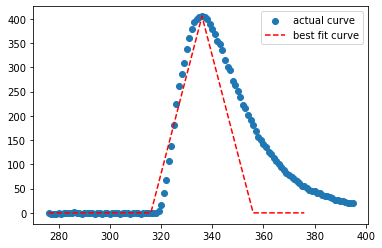

In [5]:
#Import Library
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit


from matplotlib import pyplot as plt
import numpy as np

#Mathematical distribution function to be fitted,over the data files
def lognorm(x, mu, sigma) :

    return 1/(np.sqrt(2*np.pi)*sigma*x)*np.exp(-((np.log(x)-mu)**2)/(2*sigma**2))

#import file which is in directory
data = np.loadtxt('file_1.txt')

#choose the input and output variables
x, y = data[:, 0], data[:, 1]

#graph of curve fit
popt, _ = curve_fit(lognorm, x, y)

#All  parameter values
mu, sigma = popt

# plot input vs output
plt.scatter(x, y)

#define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 20)

#calculate the output for the range
y_line = lognorm(x_line, mu, sigma)

#create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.legend(["actual curve", "best fit curve"], loc="best")
plt.show()

### <span style="color:red">2.2 Plotting text file data with Gaussian fitting curves


345.3212747631352 226.84980531680444


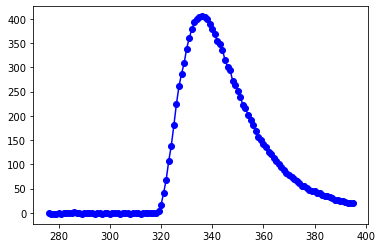

In [6]:
# load the dataset
data = np.loadtxt('file_1.txt')

# choose the input and output variables
x, y = data[:, 0], data[:, 1]
def gauss(x, a, x0, sigma):

    return a*np.exp(-(x-x0)**2/(2*sigma**2))

x1 = np.array(x)
n = len(x1)
mean = sum(x*y)/sum(y)
sigma = sum(y*(x-mean)**2)/sum(y)
print(mean, sigma)

#plot
popt, pcov = curve_fit(gauss, x, y, p0=[1, mean, sigma])
plt.plot(x,y,'-ob', label = 'data')


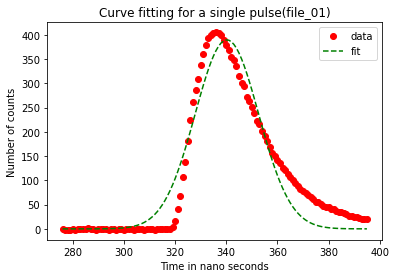

In [7]:
#plot of file_01
plt.plot(x,y,'ro', label = 'data')
plt.plot(x, gauss(x, *popt), 'g--', label='fit')
plt.legend()
plt.title('Curve fitting for a single pulse(file_01)')
plt.xlabel('Time in nano seconds')
plt.ylabel('Number of counts')
plt.show()

## <span style="color:orange">3 Multiple Text File Handling and Visualizing

In [8]:
#creating a variable
x=list()
y=list()
Tmax=list()
Tmin=list()
filenames=list()
rise=list()
decay=list()

#reading all files 
for i in range (0,101):
    filenames.append('file_'+str(i)+'.txt')
for a in filenames:
    temp=list()
    for b in open(a):
        temp=b.split()
        x.append(float(temp[0]))
        y.append(float(temp[1]))
#arrange in assending order
for i in range(0, len(x) - 1):
    smallest = i
    for j in range(i + 1, len(x)):
         if x[j] < x[smallest]:
            smallest = j
x[i], x[smallest] = x[smallest], x[i]
y[i], y[smallest] = y[smallest], y[i]
print(x)
print(y)
print()



[264.0, 265.0, 266.0, 267.0, 268.0, 269.0, 270.0, 271.0, 272.0, 273.0, 274.0, 275.0, 276.0, 277.0, 278.0, 279.0, 280.0, 281.0, 282.0, 283.0, 284.0, 285.0, 286.0, 287.0, 288.0, 289.0, 290.0, 291.0, 292.0, 293.0, 294.0, 295.0, 296.0, 297.0, 298.0, 299.0, 300.0, 301.0, 302.0, 303.0, 304.0, 305.0, 306.0, 307.0, 308.0, 309.0, 310.0, 311.0, 312.0, 313.0, 314.0, 315.0, 316.0, 317.0, 318.0, 319.0, 320.0, 321.0, 322.0, 323.0, 324.0, 325.0, 326.0, 327.0, 328.0, 329.0, 330.0, 331.0, 332.0, 333.0, 334.0, 335.0, 336.0, 337.0, 338.0, 339.0, 340.0, 341.0, 342.0, 343.0, 344.0, 345.0, 346.0, 347.0, 348.0, 349.0, 350.0, 351.0, 352.0, 353.0, 354.0, 355.0, 356.0, 357.0, 358.0, 359.0, 360.0, 361.0, 362.0, 363.0, 364.0, 365.0, 366.0, 367.0, 368.0, 369.0, 370.0, 371.0, 372.0, 373.0, 374.0, 375.0, 376.0, 377.0, 378.0, 379.0, 380.0, 381.0, 382.0, 383.0, 276.0, 277.0, 278.0, 279.0, 280.0, 281.0, 282.0, 283.0, 284.0, 285.0, 286.0, 287.0, 288.0, 289.0, 290.0, 291.0, 292.0, 293.0, 294.0, 295.0, 296.0, 297.0, 298.0

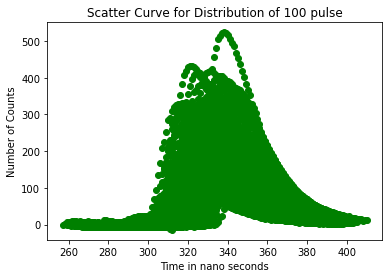

In [9]:
#plot
plt.scatter(x,y,color='green')
plt.title("Scatter Curve for Distribution of 100 pulse")
plt.xlabel("Time in nano seconds")
plt.ylabel("Number of Counts")
plt.show()

## <center><span style="color:purple">Conclusion

As per the above data set maximum data is seen in between the 310-355 in time in nano second.

#  <center><span style="color:red">THANK YOU :-)